# Atención a clientes 

# Diccionario de datos

* `id_llamada` - Contiene el identificador de la llamada.
* `fecha` - Fecha en la que se realizó la llamada.
* `asesor` - Nombre del asesor que atendió la llamada.
* `area` - Área en donde fue recibida la llamada.
* `atendida` - Indica si la llamada fue atendida o no.
* `resuelto` - Indica si se resolvió el problema por el cual el cliente llamó (0 = no, 1 = sí).
* `tiempo_respuesta` - Tiempo que tardó el asesor en contestar (en segundos).
* `duracion_llamada` - Duración total de la llamada (en minutos con segundos).
* `duracion_llamada_asistida` - Tiempo de la llamada con asistencia del asesor (en segundos).
* `indice_satisfaccion` - Índice de satisfacción de 1 a 5 (donde 1 es pésimo y 5 es excelente).

In [1]:
# Librerias utilizadas
import datetime as dt 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
# Cargar el dataset 
servicio = pd.read_excel("./datasets/datos_de_servicio.xlsx")

In [3]:
# Funcion para obtener información general del dataset
def leer_datos(df):
    print(df.head())
    print(df.info())
    print(df.describe())

In [4]:
leer_datos(servicio)

  Id Llamada      Fecha   Asistente           Área Respondido Resuelto (S/N)  \
0     ID0001 2023-03-22     Juan D.         Ventas         SÍ              S   
1     ID0002 2023-03-17  Marcelo F.       RECLAMOS         SÍ              N   
2     ID0003 2023-03-18  Leandro C.         Ventas         SÍ              S   
3     ID0004 2023-03-09  Leandro C.         Ventas         SÍ              S   
4     ID0007 2023-03-01   Marina Z.  Cancelaciones         SÍ              S   

   Velocidad de respuesta Duración de la llamada  \
0                     109               00:02:23   
1                      70               00:04:02   
2                      10               00:02:11   
3                      53               00:00:37   
4                      24               00:03:40   

   Duración con asistente en segundos  Índice de satisfacción  
0                                 143                       2  
1                                 242                       3  
2             

## 1. Pre-procesamiento de datos

1. Normalizar el nombre de las columnas 
2. Convertir a minusculas los datos de las columnas `asesor` y `area`
2. Quitar asentos de la columna `atendida`
3. Convetir los datos de la columna `resuelto` 0 para no y 1 para si 
4. Convetir a segundos el tiempo de la columna `duracion_llamada` 


In [5]:
print(servicio.columns)

Index(['Id Llamada', 'Fecha', 'Asistente', 'Área', 'Respondido',
       'Resuelto (S/N)', 'Velocidad de respuesta', 'Duración de la llamada',
       'Duración con asistente en segundos', 'Índice de satisfacción'],
      dtype='object')


In [6]:
# normalizar el nombre de las columnas
columns_new = {'Id Llamada': 'id_llamada', 
               'Fecha' : 'fecha', 
               'Asistente' : 'asesor',
               'Área' : 'area',
               'Respondido' : 'respondio',
               'Resuelto (S/N)' : 'resuelto',
               'Velocidad de respuesta': 'tiempo_respuesta',
               'Duración de la llamada': 'duracion_llamada_min',
               'Duración con asistente en segundos': 'duracion_llamada_asistida',
               'Índice de satisfacción' : 'indice_satisfaccion'
}

In [7]:
# cambiar nombre columnas antiguas a nuevas
servicio = servicio.rename(columns=columns_new)

In [8]:
# convertir a minusculas los datos de asesor y area 
def to_lower(df,columns):
    df[columns] = df[columns].apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
    return df

In [9]:
# llamar a la funcion
to_lower(servicio, ['asesor', 'area'])

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion
0,ID0001,2023-03-22,juan d.,ventas,SÍ,S,109,00:02:23,143,2
1,ID0002,2023-03-17,marcelo f.,reclamos,SÍ,N,70,00:04:02,242,3
2,ID0003,2023-03-18,leandro c.,ventas,SÍ,S,10,00:02:11,131,3
3,ID0004,2023-03-09,leandro c.,ventas,SÍ,S,53,00:00:37,37,2
4,ID0007,2023-03-01,marina z.,cancelaciones,SÍ,S,24,00:03:40,220,2
...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,SÍ,S,92,00:06:00,360,4
1005,ID1765,2023-03-05,ana s.,ventas,SÍ,S,95,00:05:00,300,3
1006,ID1766,2023-03-20,gustavo m.,ventas,SÍ,S,49,00:01:58,118,5
1007,ID1770,2023-03-04,ana s.,cancelaciones,SÍ,S,78,00:01:02,62,4


In [10]:
# convetir los datos de la columna respondio
servicio['respondio'] = servicio['respondio'].replace("SÍ", "si")

In [11]:
# convetir los datos de la columna resuelto
servicio['resuelto'] = servicio['resuelto'].replace(['S', 'N'], ['1','0'])

In [12]:
# convertir los datos de la columna resuelto a int 
servicio['resuelto'] = servicio['resuelto'].astype('int')

## Enriquecer los datos

In [13]:
# convertir los datos de duracion llamada a minutos
servicio['duracion_llamada_min'] = pd.to_timedelta(servicio['duracion_llamada_min']).dt.total_seconds() / 60

In [14]:
# redondear a dos decimales el numero obtenido
servicio['duracion_llamada_min'] = servicio['duracion_llamada_min'].round(2)

In [15]:
# agregar una columna con los dias 
servicio['dias'] = servicio['fecha'].dt.day
servicio

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion,dias
0,ID0001,2023-03-22,juan d.,ventas,si,1,109,2.38,143,2,22
1,ID0002,2023-03-17,marcelo f.,reclamos,si,0,70,4.03,242,3,17
2,ID0003,2023-03-18,leandro c.,ventas,si,1,10,2.18,131,3,18
3,ID0004,2023-03-09,leandro c.,ventas,si,1,53,0.62,37,2,9
4,ID0007,2023-03-01,marina z.,cancelaciones,si,1,24,3.67,220,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,si,1,92,6.00,360,4,6
1005,ID1765,2023-03-05,ana s.,ventas,si,1,95,5.00,300,3,5
1006,ID1766,2023-03-20,gustavo m.,ventas,si,1,49,1.97,118,5,20
1007,ID1770,2023-03-04,ana s.,cancelaciones,si,1,78,1.03,62,4,4


## 2. Análisis exploratorio (EDA)

* Identificar valores duplicados
* Identificar valores ausentes 
* Identificar valores atípicos

In [16]:
def valores(df):
    print("El número de valores duplicados es:", df.duplicated().sum())
    print("El número de valores ausentes es:\n", df.isna().sum())

In [17]:
valores(servicio)

El número de valores duplicados es: 0
El número de valores ausentes es:
 id_llamada                   0
fecha                        0
asesor                       0
area                         0
respondio                    0
resuelto                     0
tiempo_respuesta             0
duracion_llamada_min         0
duracion_llamada_asistida    0
indice_satisfaccion          0
dias                         0
dtype: int64


In [18]:
# valores atipicos 
servicio.describe()

,fecha,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion,dias
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,2023-03-15 15:19:05.292368640,0.926660,66.682854,3.729693,223.778989,3.402379,15.638256
min,2023-03-01 00:00:00,0.000000,10.000000,0.500000,30.000000,1.000000,1.000000
25%,2023-03-08 00:00:00,1.000000,40.000000,2.120000,127.000000,3.000000,8.000000
50%,2023-03-15 00:00:00,1.000000,67.000000,3.800000,228.000000,3.000000,15.000000
75%,2023-03-23 00:00:00,1.000000,95.000000,5.400000,324.000000,4.000000,23.000000
max,2023-03-31 00:00:00,1.000000,125.000000,6.980000,419.000000,5.000000,31.000000
std,NaN,0.260823,33.342953,1.883554,113.007689,1.201287,8.868247


### Explorar valores de las 3 columnas de tiempo


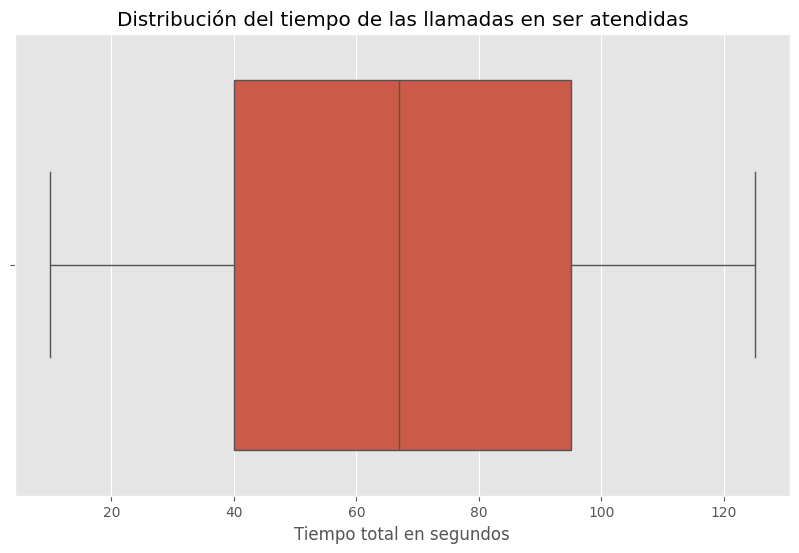

In [19]:
# estilo del grafico
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, x='tiempo_respuesta')
    # formato 
    plt.title('Distribución del tiempo de las llamadas en ser atendidas')
    plt.xlabel('Tiempo total en segundos')
    
    plt.show()

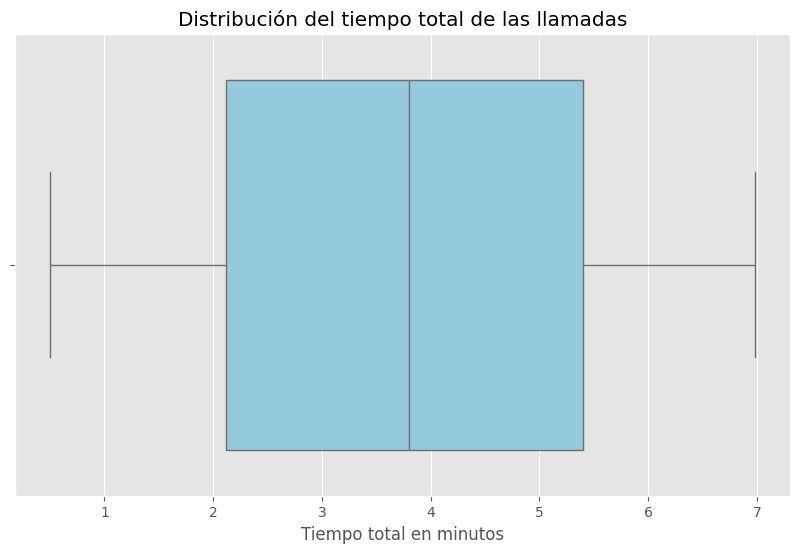

In [20]:
# distribucion duracion de las llamadas en minutos
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, 
                x='duracion_llamada_min', 
                color='skyblue')
    # formato 
    plt.title('Distribución del tiempo total de las llamadas')
    plt.xlabel('Tiempo total en minutos')
    
    plt.show()

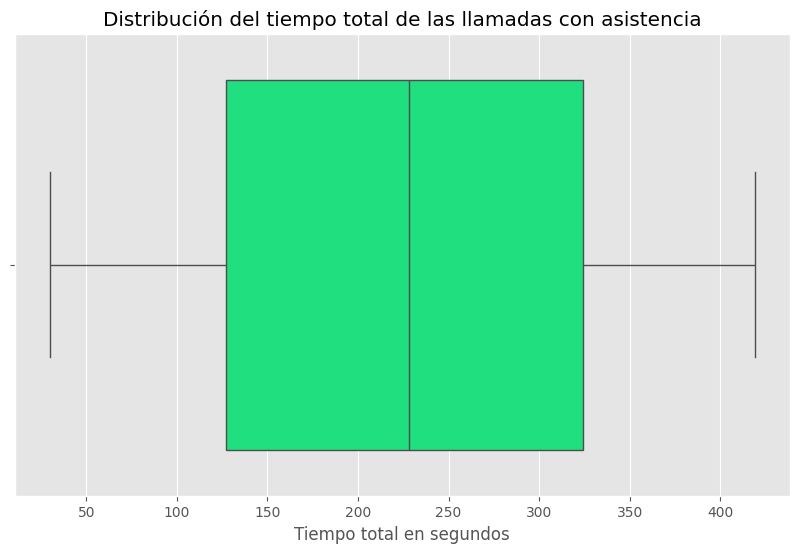

In [21]:
# distribucion duracion de las llamadas en segundos
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, 
                x='duracion_llamada_asistida', 
                color='springgreen')
    # formato 
    plt.title('Distribución del tiempo total de las llamadas con asistencia')
    plt.xlabel('Tiempo total en segundos')
    
    plt.show()

## Análisis solicitado: 

1. Eficiencia en la atención:
* ¿Cuál es el tiempo promedio de respuesta de los asesores?
* ¿Existe alguna variación en el tiempo de respuesta según el área?

2. Duración de las llamadas:
* ¿Cuál es la distribución de la duración total de las llamadas?
* ¿Qué porcentaje del tiempo total de espera representa el tiempo asistido por un asesor?

3. Satisfacción del cliente:

* ¿Cuál es el promedio y la distribución del índice de satisfacción?
* ¿Hay una relación entre la duración de la llamada y la satisfacción del cliente?

4. Carga de trabajo y eficiencia

* ¿Cuál es el número total de llamadas atendidas por cada asesor? (Distribución de llamadas por asesor - gráfico de barras)
* ¿Cuál es el tiempo promedio de respuesta por asesor? (Boxplot o gráfico de líneas para comparar la rapidez de respuesta)
* ¿Qué asesores tienen la mayor duración promedio de llamadas? (Comparación de duración total vs. duración asistida por asesor - gráfico de barras o scatter plot)
* ¿Qué asesores tienen el índice de satisfacción más bajo y más alto? (Gráfico de barras ordenado o heatmap)
* ¿Hay áreas con un indice de satisfacción bajo?
* ¿Hay áreas con un indice de satisfacción alto?

### 1. Eficiencia en la atención

#### a) ¿Cuál es el tiempo promedio de respuesta de los asesores?

In [22]:
# calcular el tiempo promedio de respuesta de los asesores
promedio_respuesta = servicio['tiempo_respuesta'].mean()
# redondear valor
promedio_respuesta = promedio_respuesta.round(2)
# imprimir el tiempo
print(f"El tiempo promedio de respuesta de los asesores es de: {promedio_respuesta} segundos") 

El tiempo promedio de respuesta de los asesores es de: 66.68 segundos


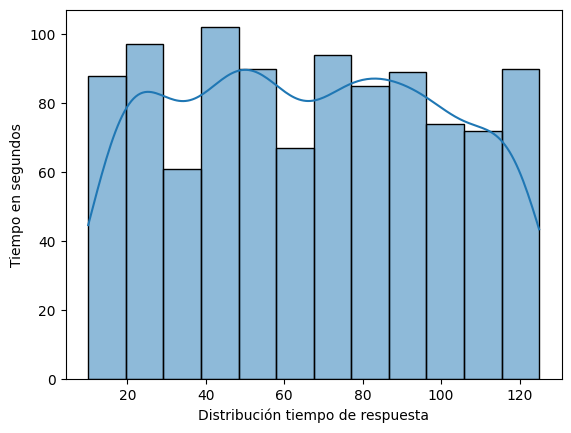

In [23]:
# histograma de distribucion de tiempo
sns.histplot(data=servicio,
             x='tiempo_respuesta', 
              binwidth=10, 
             bins=20,
             kde=True)
plt.xlabel('Distribución tiempo de respuesta')
plt.ylabel('Tiempo en segundos')
plt.show()

#### b) ¿Existe alguna variación en el tiempo de respuesta según el área?

In [24]:
# variacion en el tiempo de respuesta segun el area 
area_tiempo = servicio.groupby('area')['tiempo_respuesta'].sum().reset_index(name='tiempo_por_area')
# ordenar los datos de mayor a menor 
area_tiempo = area_tiempo.sort_values(by='tiempo_por_area')
# mostrar tabla
area_tiempo

,area,tiempo_por_area
2,reclamos,12781
1,intercambios,13265
0,cancelaciones,13480
3,ventas,27757


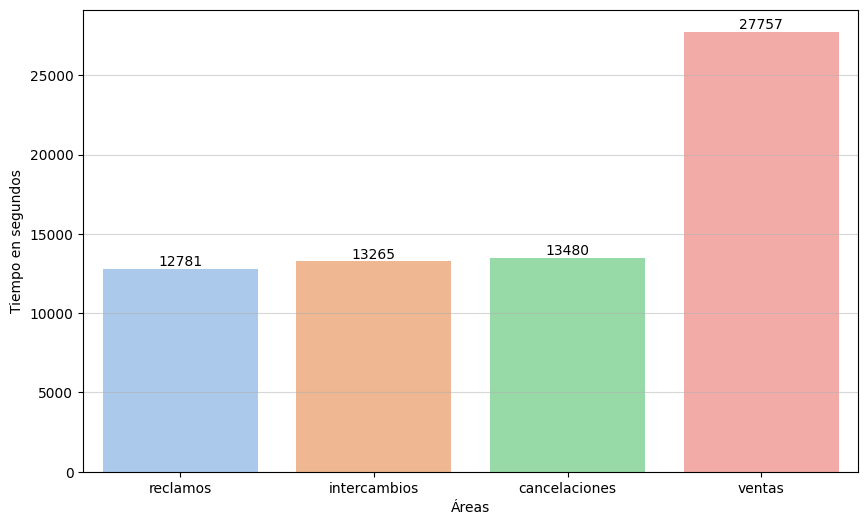

In [25]:
# grafica del tiempo de respuesta por area
with sns.color_palette("pastel"):
    plt.figure(figsize=(10,6))

    ax = sns.barplot(area_tiempo,
                    x='area', 
                    y='tiempo_por_area',
                    hue='area', 
                    estimator='sum')
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

plt.xlabel('Áreas')
plt.ylabel('Tiempo en segundos')
plt.grid(axis='y', alpha=0.5)
plt.show()

### 2. Duración de las llamadas

#### a) ¿Cuál es la distribución de la duración total de las llamadas?

In [26]:
# calcular el tiempo de duracion de las llamadas
llamada_total = servicio['duracion_llamada_min'].mean()
# redondear valor
llamada_total = llamada_total.round(2)
# imprimir el tiempo
print(f"El tiempo promedio de respuesta de los asesores es de: {llamada_total} minutos") 

El tiempo promedio de respuesta de los asesores es de: 3.73 minutos


#### b) ¿Qué porcentaje del tiempo total de la llamada es asistido por un asesor?

In [27]:
# porcentaje del tiempo total de espera representa el tiempo asistido por un asesor
servicio['%_tiempo'] = (servicio['duracion_llamada_asistida'] * 100) / (servicio['duracion_llamada_asistida'] + servicio['tiempo_respuesta'])
# redondear los resultados 
servicio['%_tiempo'] = servicio['%_tiempo'].round(2)
# mostrar resultados
servicio

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion,dias,%_tiempo
0,ID0001,2023-03-22,juan d.,ventas,si,1,109,2.38,143,2,22,56.75
1,ID0002,2023-03-17,marcelo f.,reclamos,si,0,70,4.03,242,3,17,77.56
2,ID0003,2023-03-18,leandro c.,ventas,si,1,10,2.18,131,3,18,92.91
3,ID0004,2023-03-09,leandro c.,ventas,si,1,53,0.62,37,2,9,41.11
4,ID0007,2023-03-01,marina z.,cancelaciones,si,1,24,3.67,220,2,1,90.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,si,1,92,6.00,360,4,6,79.65
1005,ID1765,2023-03-05,ana s.,ventas,si,1,95,5.00,300,3,5,75.95
1006,ID1766,2023-03-20,gustavo m.,ventas,si,1,49,1.97,118,5,20,70.66
1007,ID1770,2023-03-04,ana s.,cancelaciones,si,1,78,1.03,62,4,4,44.29


In [28]:
# promedio de porcentaje de tiempo total 
promedio_tiempo = servicio['%_tiempo'].mean()
# redondear el valor 
promedio_tiempo = promedio_tiempo.round(2)
# mostrar porcentaje
print(f'El porcentaje promedio de espera es: {promedio_tiempo}%')

El porcentaje promedio de espera es: 73.73%


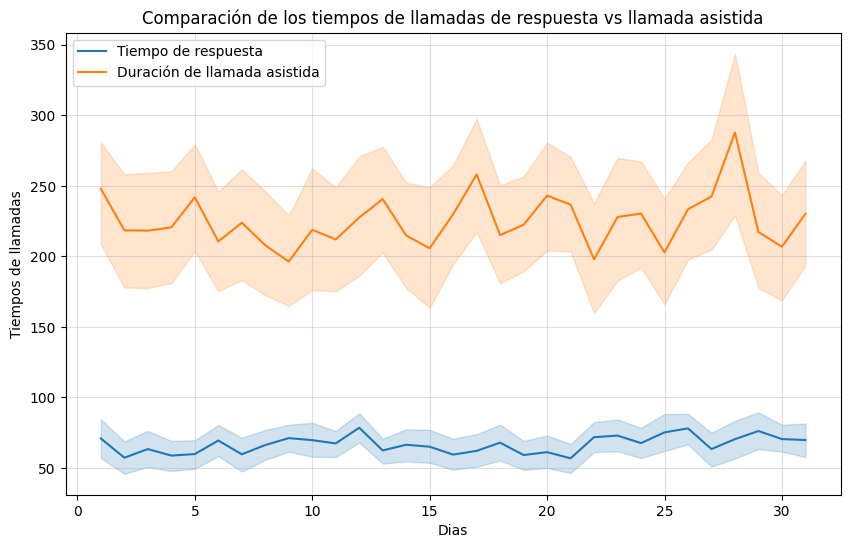

In [29]:
# grafica comparativa tiempos de llamadas
plt.figure(figsize=(10,6))
# grafico
sns.lineplot(data=servicio, 
             x='dias', 
             y='tiempo_respuesta',
             label='Tiempo de respuesta')
sns.lineplot(data=servicio, 
             x='dias', 
             y='duracion_llamada_asistida', 
             label='Duración de llamada asistida')
# formato grafico 
plt.title('Comparación de los tiempos de llamadas de respuesta vs llamada asistida')
plt.xlabel('Dias')
plt.ylabel('Tiempos de llamadas')
plt.grid(axis='both', alpha=0.4)
plt.legend()
# mostrar grafico
plt.show()

### 3. Satisfacción del cliente

#### a) ¿Cuál es el promedio y la distribución del índice de satisfacción?

In [30]:
# calcular promedio satisfaccion
promedio_satisfaccion = servicio['indice_satisfaccion'].mean()
# redondear valor
promedio_satisfaccion = promedio_satisfaccion.round(2)
# mostrar resultado
print(f'El promedio del indice de satisfacción es: {promedio_satisfaccion} puntos')

El promedio del indice de satisfacción es: 3.4 puntos


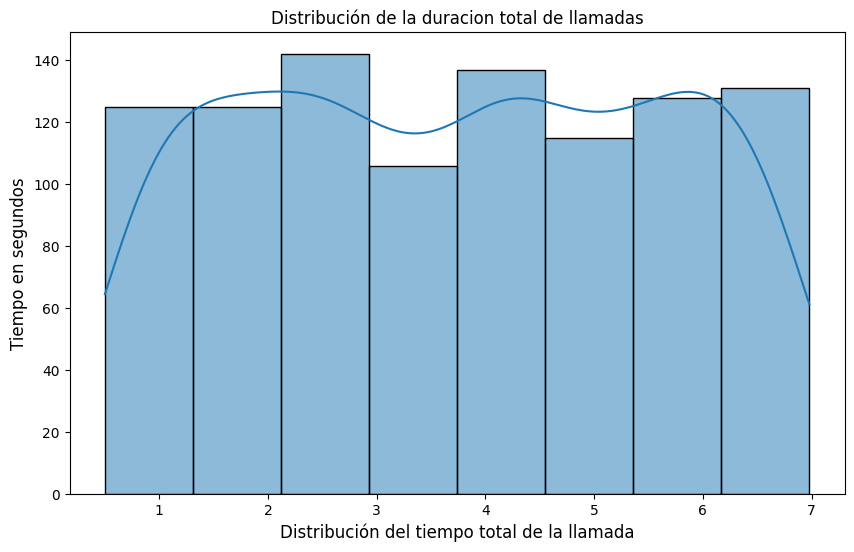

In [31]:
# distribucion de la duracion total de llamadas 
plt.figure(figsize=(10,6))
sns.histplot(data=servicio,
             x='duracion_llamada_min', 
             bins=8,
             kde=True)

plt.title('Distribución de la duracion total de llamadas', fontsize=12)
plt.xlabel('Distribución del tiempo total de la llamada', fontsize=12)
plt.ylabel('Tiempo en segundos', fontsize=12)
plt.show()

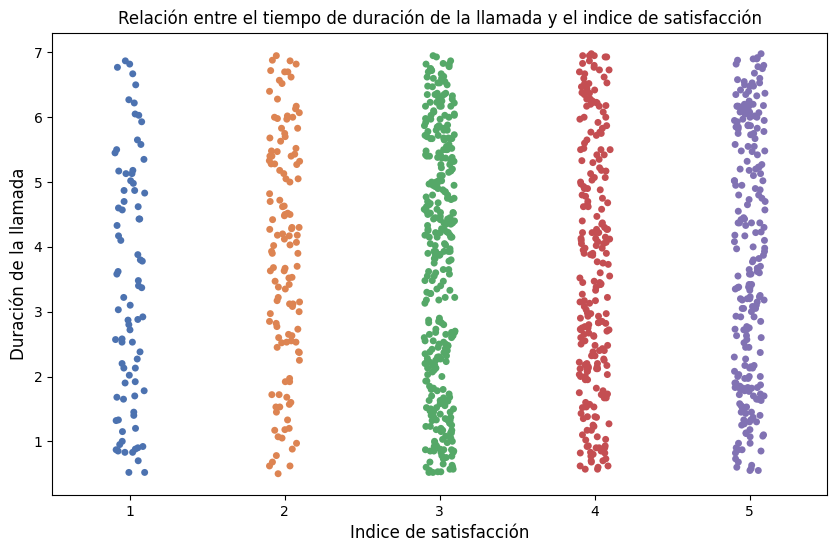

In [32]:
# grafico de la relacion entre llamadas y la satisfaccion 
plt.figure(figsize=(10,6))
# desarrollo grafico
sns.stripplot(data=servicio, 
              x='indice_satisfaccion', 
              y='duracion_llamada_min', 
              hue='indice_satisfaccion', 
              jitter=True,
              palette='deep',
              legend=False)

plt.title('Relación entre el tiempo de duración de la llamada y el indice de satisfacción', fontsize=12)
plt.xlabel('Indice de satisfacción', fontsize=12)
plt.ylabel('Duración de la llamada', fontsize=12)
plt.show()

### 4. Carga de trabajo y eficiencia

#### a) ¿Cuál es el número total de llamadas atendidas por cada asesor?

In [33]:
# numero total de asesores
asesor_unico = servicio['asesor'].nunique()
print(f'Hay un total de {asesor_unico} asesores')

Hay un total de 7 asesores


In [34]:
# mostrar las llamadas atendidas por asesor
asesor_llamadas = servicio.groupby('asesor')['respondio'].count().reset_index(name='total_llamadas_atendidas')
# ordenar de manera ascendente 
asesor_llamadas.sort_values(by='total_llamadas_atendidas', inplace=True)
# mostrar resultados
asesor_llamadas

,asesor,total_llamadas_atendidas
4,marcelo f.,115
0,ana s.,136
1,gustavo m.,137
5,marina z.,148
6,paulo g.,149
3,leandro c.,153
2,juan d.,171


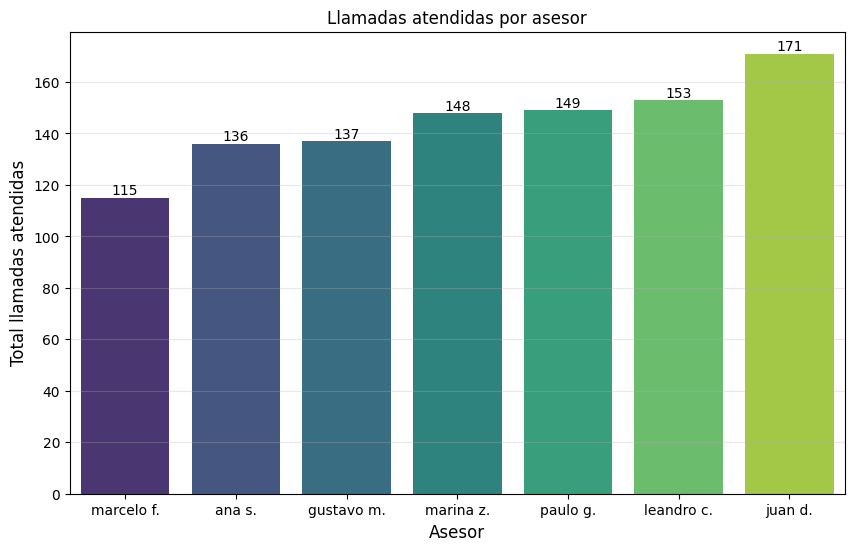

In [35]:
# grafica de llamadas atendidas por un asesor
plt.figure(figsize=(10,6))
ax = sns.barplot(data=asesor_llamadas, 
             x='asesor', 
            y='total_llamadas_atendidas',
            hue='asesor', 
            estimator='sum', 
            palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Llamadas atendidas por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12 )
plt.ylabel('Total llamadas atendidas', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

#### b) ¿Cuál es el tiempo promedio de respuesta por asesor? 

In [36]:
# calcular el tiempo promedio de respuesta por asesor
tiempo_asesor = servicio.groupby('asesor')['tiempo_respuesta'].mean().reset_index(name='tiempo_respuesta')
# ordenar los datos
tiempo_asesor.sort_values(by='tiempo_respuesta', inplace=True)
# redondear datos
tiempo_asesor = tiempo_asesor.round(2)
# mostrar resultado
tiempo_asesor

,asesor,tiempo_respuesta
4,marcelo f.,60.88
5,marina z.,65.12
2,juan d.,66.72
3,leandro c.,67.05
6,paulo g.,67.06
0,ana s.,68.60
1,gustavo m.,70.48


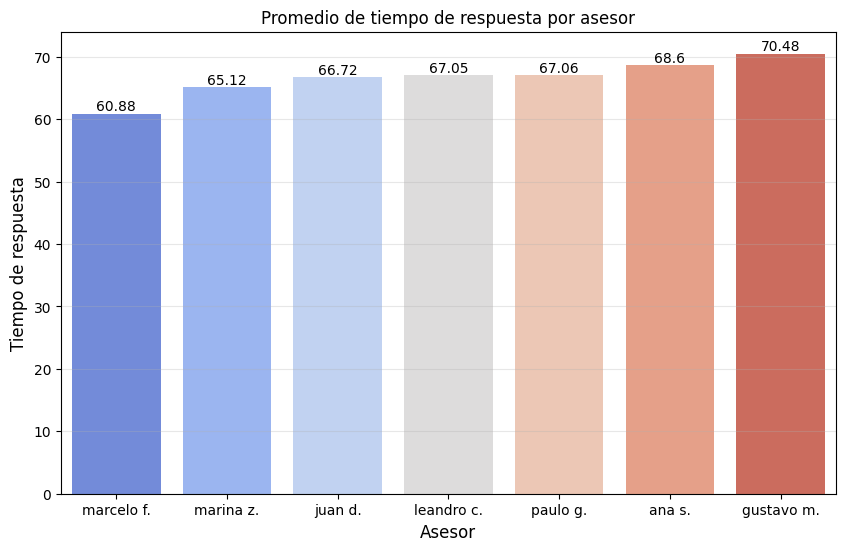

In [37]:
# grafica de llamadas atendidas por un asesor
plt.figure(figsize=(10,6))
ax = sns.barplot(data=tiempo_asesor, 
             x='asesor', 
             y='tiempo_respuesta',
            hue='asesor', 
            estimator='mean', 
            palette='coolwarm')
for container in ax.containers:
     ax.bar_label(container, fontsize=10)

plt.title('Promedio de tiempo de respuesta por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12 )
plt.ylabel('Tiempo de respuesta', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

#### c) ¿Qué asesores tienen la mayor duración promedio de llamadas? 

In [38]:
# calcular el promedio de la duracion de llamada 
llamada_promedio = servicio.groupby('asesor')['duracion_llamada_min'].mean().reset_index(name='tiempo_llamada')
# ordenar de menor a mayor 
llamada_promedio.sort_values(by='tiempo_llamada', inplace=True)
# redondear valores 
llamada_promedio = llamada_promedio.round(2)
# mostrar resultados
llamada_promedio

,asesor,tiempo_llamada
1,gustavo m.,3.54
2,juan d.,3.66
0,ana s.,3.67
5,marina z.,3.78
3,leandro c.,3.81
4,marcelo f.,3.83
6,paulo g.,3.84


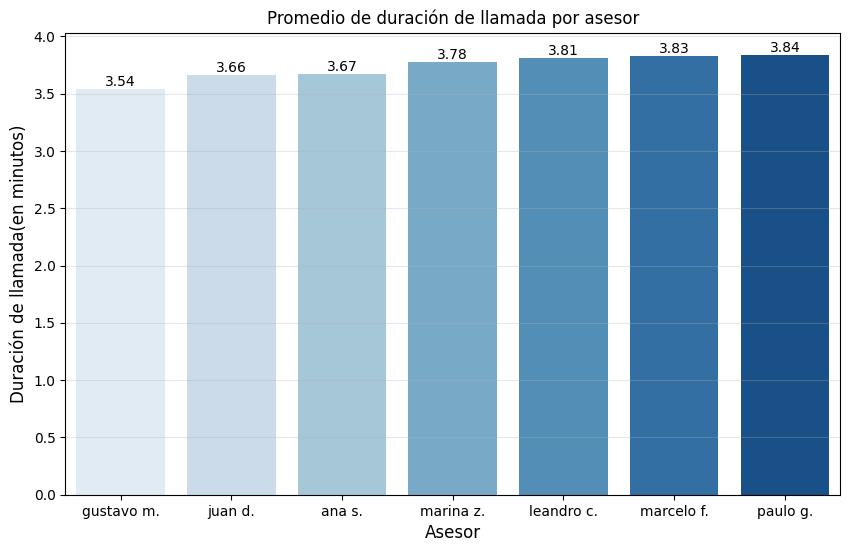

In [39]:
# grafica de llamadas atendidas por un asesor
plt.figure(figsize=(10,6))
ax = sns.barplot(data=llamada_promedio, 
             x='asesor', 
             y='tiempo_llamada',
            hue='asesor', 
            estimator='mean', 
            palette='Blues')
for container in ax.containers:
     ax.bar_label(container, fontsize=10)

plt.title('Promedio de duración de llamada por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12 )
plt.ylabel('Duración de llamada(en minutos)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

#### d) ¿Existe una relación entre la duración de la llamada y el índice de satisfacción por asesor?

In [40]:
satisfaccion_asesor = servicio.pivot_table(index='asesor', 
                                           columns='indice_satisfaccion', 
                                           values='duracion_llamada_min', 
                                           aggfunc='mean')
satisfaccion_asesor

indice_satisfaccion,1,2,3,4,5
asesor,,,,,
ana s.,3.250909,3.802500,3.853448,3.377813,3.736522
gustavo m.,2.732000,3.477692,3.801800,3.326471,3.498857
juan d.,3.240345,3.967111,3.653800,3.412273,3.813600
leandro c.,3.356923,4.051053,3.794348,3.920000,3.726389
marcelo f.,3.365833,3.140000,3.769583,3.902381,4.153103
marina z.,3.792857,3.835556,3.626207,3.742500,4.052895
paulo g.,4.476667,4.383500,3.861489,3.574839,3.661333


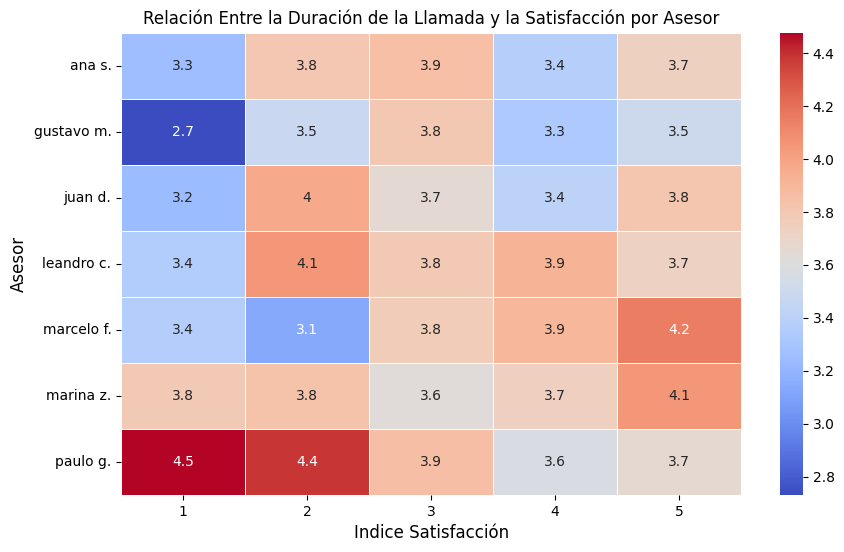

In [41]:
# mapa de calor 
plt.figure(figsize=(10,6))

sns.heatmap(satisfaccion_asesor,
            annot=True, 
            linewidth = .5, 
            cmap='coolwarm')

plt.title('Relación Entre la Duración de la Llamada y la Satisfacción por Asesor', fontsize=12)
plt.xlabel('Indice Satisfacción', fontsize=12)
plt.ylabel('Asesor', fontsize=12)

plt.show()

No hay una relacion clara entre la duracion de llamadas y mejor satisfaccion, el asesor con mejor promedio de duracion de llamada e indice de satisfaccion es paulo g. los asesores con un equilibrado tiempo de llamada e indices de satisfaccion relativamente estables son Marina, Leandro y Ana. El asesor con la relacion mas baja es Gustavo m.

#### e) ¿Qué asesores tienen el índice de satisfacción más bajo y más alto?

In [42]:
# mostrar el promedio de indice de satisfaccion
print(f'El promedio del indice de satisfacción es: {promedio_satisfaccion} puntos')

El promedio del indice de satisfacción es: 3.4 puntos


In [51]:
# calcular el indice por promedio
indice_asesor = servicio.groupby('asesor')['indice_satisfaccion'].mean().reset_index(name='satisfaccion_promedio')
# ordenar de mayor a menor
indice_asesor.sort_values(by='satisfaccion_promedio', ascending=False, inplace=True)
# redondear valores 
indice_asesor = indice_asesor.round(1)

In [52]:
# clasificar en alto y bajo
indice_asesor['clasificación'] = indice_asesor['satisfaccion_promedio'].apply(lambda x: 'Alto' if x > promedio_satisfaccion else 'Bajo')
# mostrar resultado
indice_asesor

,asesor,satisfaccion_promedio,clasificación
5,marina z.,3.6,Alto
6,paulo g.,3.6,Alto
4,marcelo f.,3.6,Alto
1,gustavo m.,3.6,Alto
3,leandro c.,3.4,Bajo
0,ana s.,3.3,Bajo
2,juan d.,2.8,Bajo


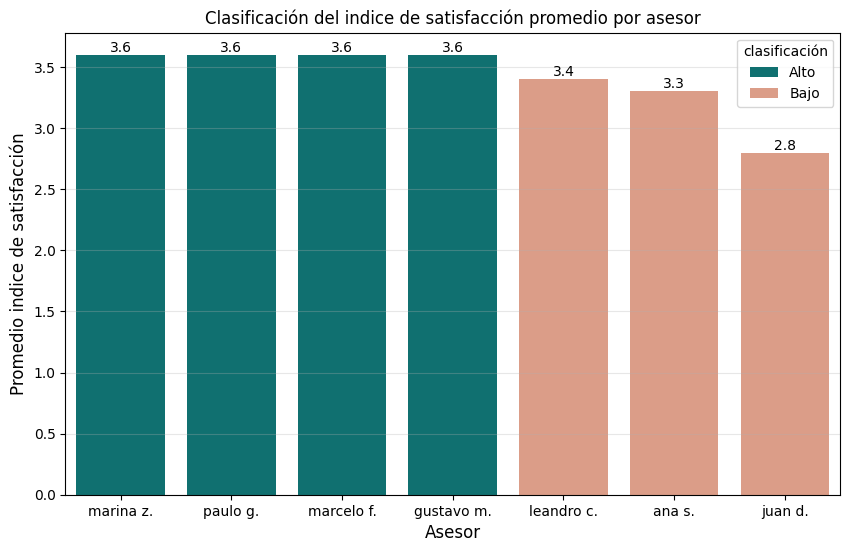

In [ ]:
# graficar los asesores por clasificacion
plt.figure(figsize=(10,6))

ax = sns.barplot(data=indice_asesor, 
            x='asesor', 
            y='satisfaccion_promedio', 
            hue='clasificación',  
            estimator='mean', 
            palette={'Alto':'teal','Bajo':'darksalmon'})
for contenedor in ax.containers:
    ax.bar_label(contenedor, fontsize=10)

plt.title('Clasificación del indice de satisfacción promedio por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12)
plt.ylabel('Promedio indice de satisfacción', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Para segmentar a los asesores en promedio alto o bajo, se utilizo el promedio de indice de satisfaccion, esto dio como resultado 4 asesores con un promedio alto y 3 bajos, siendo Marina z. la asesora con el puntaje mas alto, y Juan d. el asesor con el promedio mas bajo. 

#### f) ¿Hay áreas con un indice de satisfacción bajo?

In [55]:
# mostrar indice de satisfaccion promedio
print(f'El promedio del indice de satisfacción es: {promedio_satisfaccion} puntos')

El promedio del indice de satisfacción es: 3.4 puntos


In [67]:
# calcular el promedio de satisfaccion por area
satisfaccion_area = servicio.groupby('area')['indice_satisfaccion'].mean().reset_index(name='promedio_area')
# redondear valores
satisfaccion_area = satisfaccion_area.round(2)

In [68]:
# segmentar los datos en altos o bajos segun el promedio del indice de satisfaccion
satisfaccion_area['clasificación'] = satisfaccion_area['promedio_area'].apply(lambda x: "Alto" if x > promedio_satisfaccion else "Bajo")
# mostrar resultados
satisfaccion_area

,area,promedio_area,clasificación
0,cancelaciones,3.44,Alto
1,intercambios,3.41,Alto
2,reclamos,3.40,Bajo
3,ventas,3.38,Bajo


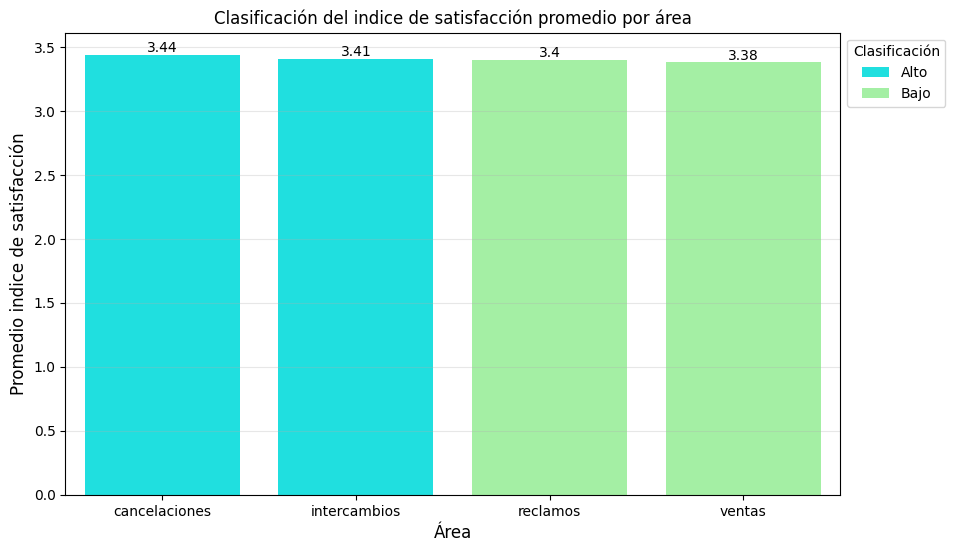

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=satisfaccion_area, 
            x='area', 
            y='promedio_area', 
            hue='clasificación',  
            estimator='mean', 
            palette={'Alto':'cyan','Bajo':'palegreen'})
for contenedor in ax.containers:
    ax.bar_label(contenedor, fontsize=10)

plt.title('Clasificación del indice de satisfacción promedio por área', fontsize=12)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Promedio indice de satisfacción', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Clasificación', bbox_to_anchor=(1,1))

plt.show()

Al analizar los promedios de satisfaccion por area se detecta que la mayoria cumple 